# Oversample function

Oversample function has been implemented in scalar X, XY, XZ, and XYZ frames reduce the pixel size of the masks and fields. This is also performed with the cut_resample function. However, this function oversamples with integer factors.

For example, this can be used to generate a SLM mask where the number of data at x,y axis is equal to the number of pixels of the SLM. However, these pixels are usually too large for the simulations, and they need to be oversamplingd. 

Now, we will show how to use the oversampling function at XY, with a chess grating mask.

In [1]:
from diffractio import np
from diffractio import um


## XY

In [2]:
from diffractio.scalar_masks_XY import Scalar_mask_XY

In [13]:
x=np.linspace(-128, 128, 16)
y=np.linspace(-128, 128, 16)
wavelength = 4*um
pixel_size = (y[-1]-y[0])/len(y)

period = 2*pixel_size
z_talbot = 2*period**2/wavelength


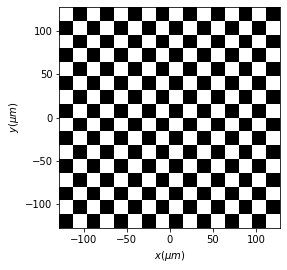

In [14]:
t0 = Scalar_mask_XY(x,y,wavelength)
t0.grating_2D_chess(r0=(0,0), period=period, fill_factor=0.5)
t0.draw(interpolation='nearest')

In [15]:
print(t0)

Scalar_mask_XY
 - x:  (16,),   y:  (16,),   u:  (16, 16)
 - xmin:       -128.00 um,  xmax:      128.00 um,  Dx:   17.07 um
 - ymin:       -128.00 um,  ymax:      128.00 um,  Dy:   17.07 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 0.00 deg
 - wavelength: 4.00 um
 - date:       2024-10-04_22_24_39



The pixel size is 17.07 micrometers, and With this pixel size, the field is not properly determined.


- Needs denser sampling: factor 0.17



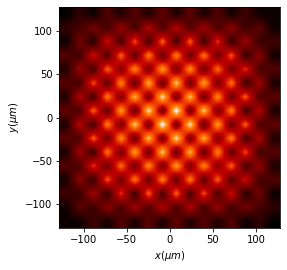

In [5]:

u0 = t0.RS(z=z_talbot/16, verbose=True)
u0.draw()

Now, let us make an oversampling of the chess grating mask.

In [ ]:
t0.oversampling(factor_rate = (16,16))

In [10]:
prinºt(t0)

Scalar_mask_XY
 - x:  (256,),   y:  (256,),   u:  (256, 256)
 - xmin:       -128.00 um,  xmax:      128.00 um,  Dx:   1.00 um
 - ymin:       -128.00 um,  ymax:      128.00 um,  Dy:   1.00 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 0.00 deg
 - wavelength: 4.00 um
 - date:       2024-10-04_22_22_17



We see that the pixel size has been decreased to 1 micrometer.

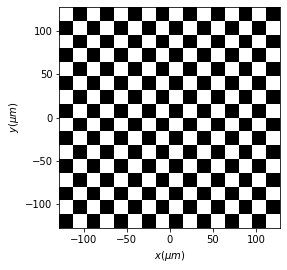

In [9]:
t0.draw(interpolation='nearest')

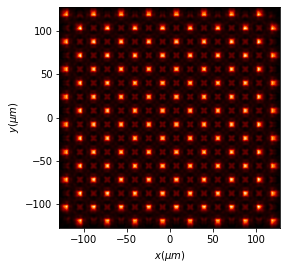

In [11]:
# Now the field is properly determined
u1 = t0.RS(z=z_talbot/16, verbose=True)
u1.draw()